In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import re
from pylab import rcParams
from sklearn import linear_model
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [3]:
def rmse(pred, tar):
    return np.sqrt(((pred - tar) ** 2).mean())

def convertAffinity(x):
    return .593*np.log(x*1e-9)

# Single Linear Regression

# Testing

In [4]:
file="rcsb-binding.csv"
dr =pd.read_csv(file, header=0, sep=',', engine='python')
dr.columns = ["Inhibitor","Predicted","Experiment","Calculated"]

In [5]:
dr

,Inhibitor,Predicted,Experiment,Calculated
0,788,-32.3381,1.70,-7.919492
1,19F,-52.3196,0.80,-8.368836
2,87R,-39.1155,24.00,-6.341287
3,9GA,-42.1323,0.61,-8.530478
4,EH9,-33.5495,1000.00,-4.117907
5,IBM,-25.8262,40000.00,-1.918862
6,Q2T,-42.5690,10.10,-6.857247
7,1L6,-42.0940,45.00,-5.966556
8,7XS,-41.6994,66.60,-5.732848
9,7XV,-36.1345,389.60,-4.679838


In [6]:
X = sm.add_constant(dr["Predicted"])
Y = dr["Calculated"]

results = sm.OLS(Y,X.astype(float)).fit()
print(results.summary())

regr = linear_model.LinearRegression()
regr.fit(X,Y)
b = regr.intercept_
m = regr.coef_[1]
print('Y-Intercept: ', regr.intercept_)
print('Slope: ', regr.coef_)

                            OLS Regression Results                            
Dep. Variable:             Calculated   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     6.946
Date:                Sun, 20 Mar 2022   Prob (F-statistic):             0.0163
Time:                        22:55:33   Log-Likelihood:                -35.633
No. Observations:                  21   AIC:                             75.27
Df Residuals:                      19   BIC:                             77.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7356      2.215     -0.332      0.7

RMSD is: 32.19508021640866


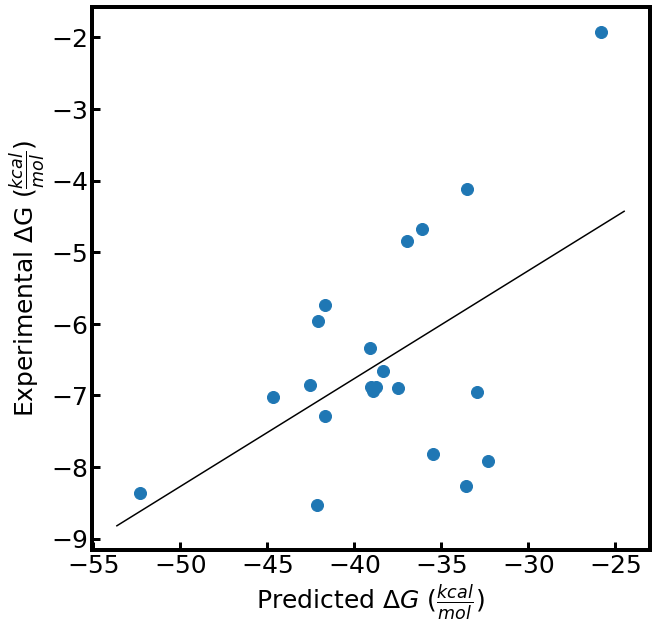

In [7]:
X=dr["Predicted"]
Y=dr["Calculated"]

# Scatter plot
plt.scatter(X, Y, s=12**2, c='C0')
# Add correlation line
axes = plt.gca()
m, b = np.polyfit(X, Y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-',color='k')
plt.xlabel(r'Predicted $\Delta G \ (\frac{kcal}{mol})$', fontsize=25)
plt.ylabel(r'Experimental $\Delta$G $(\frac{kcal}{mol})$', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tick_params(which='both',direction='in',length=8, width=3,)
# Save figure
#plt.savefig(graph_filepath, dpi=300, format='png', bbox_inches='tight')
plt.savefig("../figs/new-correlation.png", format='png', transparent=True, bbox_inches='tight')

rmse_val = rmse(X, Y)
print("RMSD is: " + str(rmse_val))